In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

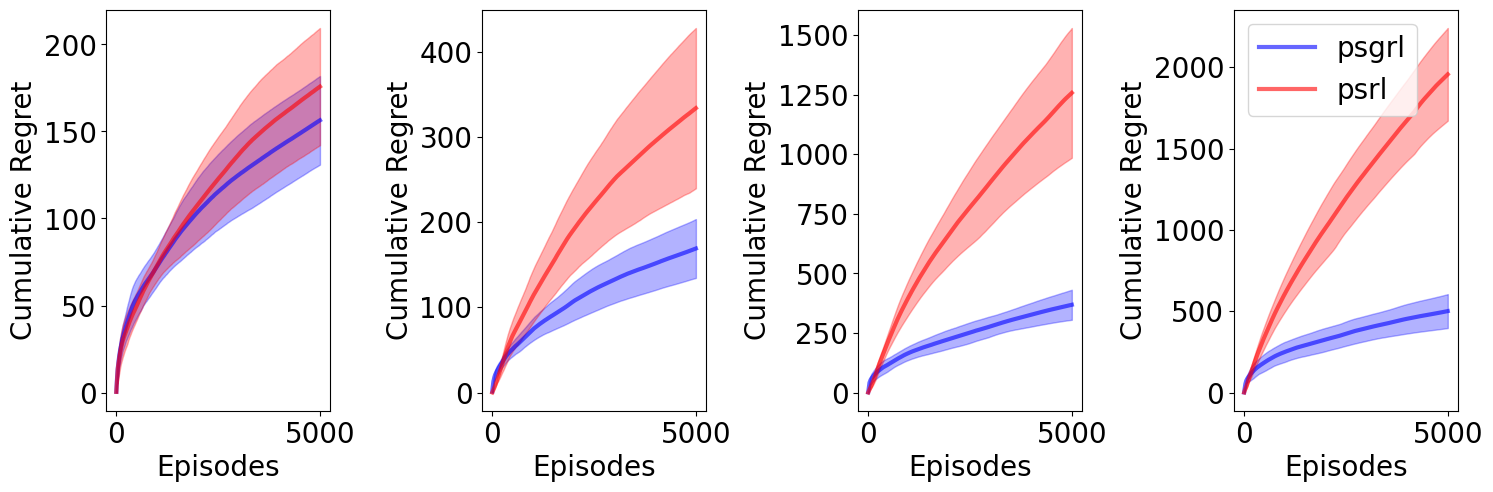

In [3]:
regret_psgrl = np.load("computations/maxFlow_psgrl_regret.npy")
regret_psrl = np.load("computations/maxFlow_psrl_regret.npy")

fig, ax = plt.subplots(1, 4,figsize=(15,5))

for i in range(4):
    regret = np.cumsum(np.abs(regret_psgrl[i,:,:]), axis=0)
    mean_psgrl = np.mean(regret, axis=1)
    std_psgrl = np.std(regret, axis=1)
    ax[i].plot(mean_psgrl, c='b', linewidth=3, alpha=0.6, label='psgrl')
    ax[i].fill_between(np.arange(len(mean_psgrl)), mean_psgrl-std_psgrl, mean_psgrl+std_psgrl, color='b', alpha=0.3)

    regret = np.cumsum(np.abs(regret_psrl[i,:,:]), axis=0)
    mean_psrl = np.mean(regret, axis=1)
    std_psrl = np.std(regret, axis=1)
    ax[i].plot(mean_psrl, c='r', linewidth=3, alpha=0.6, label='psrl')
    ax[i].fill_between(np.arange(len(mean_psrl)), mean_psrl-std_psrl, mean_psrl+std_psrl, color='r', alpha=0.3)
    ax[i].set_ylabel('Cumulative Regret')
    ax[i].set_xlabel('Episodes')
    if i == 4-1:
        plt.legend()
    plt.tight_layout(pad=0.5)
    plt.savefig('figures/maxFlow.svg')

# Visualise alternative graphs

In [4]:
import networkx as nx
def plot_graph_layout(G, ax):
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, with_labels=True, pos=pos, ax=ax)
    return ax

def build_graph(G, nodes, edges):
    """
    Function that adds a set of nodes and edges
    to a graph.

    Inputs:
        - G: the graph
        - nodes : the set of nodes
        - edges : the set of edges
    """
    for node, pos in nodes.items():
        G.add_node(node, pos=pos)
    for sender, receiver in edges:
        G.add_edge(sender, receiver)


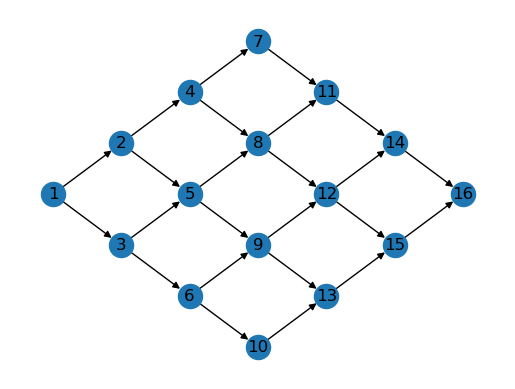

In [5]:
fig, ax = plt.subplots(1,1)
G = nx.DiGraph()
nodes = {1: (0,0), 2: (1,1), 3: (1,-1), 4: (2,2), 5: (2,0), 6: (2,-2), 7: (3,3), 8: (3,1), 9: (3,-1), 10: (3,-3), 11: (4,2), 12: (4,0), 13: (4,-2), 14: (5,1), 15:(5,-1), 16: (6,0)}
edges = [(1,2), (1,3), (2,4), (2,5), (3,5), (3,6), (4,7), (4,8), (5,8), (5,9), (6,9), (6,10), (7, 11), (8, 11), (8, 12), (9, 12), (9, 13), (10,13), (11, 14), (12, 14), (12, 15), (13, 15), (14, 16), (15, 16)]
build_graph(G, nodes, edges)
plot_graph_layout(G, ax)
plt.show()

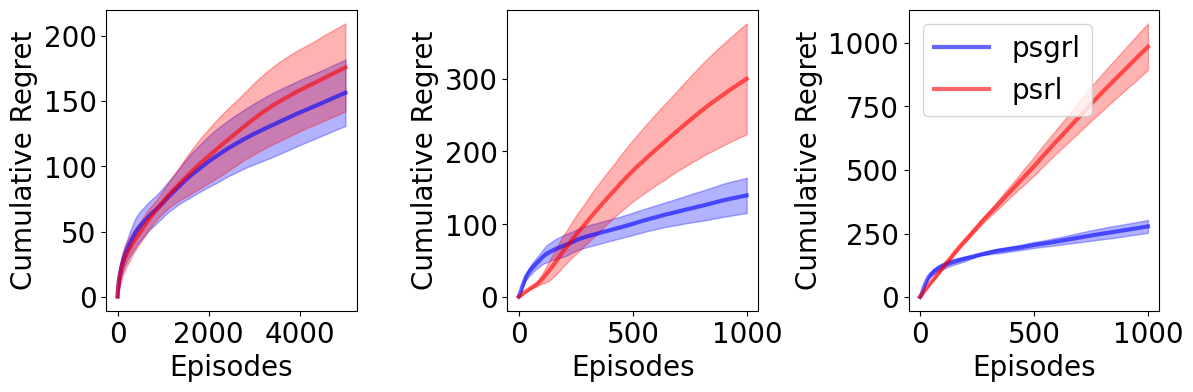

In [10]:
regret_psgrl_chain = np.load("computations/maxFlow_psgrl_regret.npy")[0, :, :]
regret_psrl_chain = np.load("computations/maxFlow_psrl_regret.npy")[0, :, :]

regret_psgrl = np.load("computations/maxFlow_diamonds_psgrl_regret.npy")
regret_psrl = np.load("computations/maxFlow_diamonds_psrl_regret.npy")

fig, ax = plt.subplots(1, 3,figsize=(12,4))

for i in range(3):
    if i == 0:
        regret = regret = np.cumsum(np.abs(regret_psgrl_chain[:,:]), axis=0)
    else:
        regret = np.cumsum(np.abs(regret_psgrl[i-1,:,:]), axis=0)
    mean_psgrl = np.mean(regret, axis=1)
    std_psgrl = np.std(regret, axis=1)
    ax[i].plot(mean_psgrl, c='b', linewidth=3, alpha=0.6, label='psgrl')
    ax[i].fill_between(np.arange(len(mean_psgrl)), mean_psgrl-std_psgrl, mean_psgrl+std_psgrl, color='b', alpha=0.3)

    if i == 0:
        regret = np.cumsum(np.abs(regret_psrl_chain[:,:]), axis=0)
    else:
        regret = np.cumsum(np.abs(regret_psrl[i-1,:,:]), axis=0)
    mean_psrl = np.mean(regret, axis=1)
    std_psrl = np.std(regret, axis=1)
    ax[i].plot(mean_psrl, c='r', linewidth=3, alpha=0.6, label='psrl')
    ax[i].fill_between(np.arange(len(mean_psrl)), mean_psrl-std_psrl, mean_psrl+std_psrl, color='r', alpha=0.3)
    ax[i].set_ylabel('Cumulative Regret')
    ax[i].set_xlabel('Episodes')
    if i == 2:
        plt.legend()
    plt.tight_layout(pad=0.5)
    plt.savefig('figures/maxFlow_diamonds.svg')